# Preliminary operations

## Drive Mount

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cd gdrive/MyDrive/Homework2

/content/gdrive/MyDrive/Homework2


## Libraries and seed

In [ ]:
import tensorflow as tf
import numpy as np
import os
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', size=16) 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler,  StandardScaler, RobustScaler, Normalizer
from sklearn.model_selection import train_test_split
import warnings
import logging

tfk = tf.keras
tfkl = tf.keras.layers
print(tf.__version__)

# Random seed for reproducibility
seed = 42

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

2.9.2


In [ ]:
!ls original_dataset	 

x_train.npy  y_train.npy


## Dataset unzip

In [ ]:
import shutil
# UNCOMMENT TO UNZIP AGAIN
#shutil.unpack_archive("training_dataset_homework2.zip", "original_dataset")

# Data exploration

In this section we loaded the provided dataset and we explored it, in terms of data and target structure and distribution. We also tried to visualize the signals, both channelwise and unfolded with multiple approaches. 

```
    Time series:
      n. observations: 2429
      observation's length: 36 samples
      n. channel per observation: 6

    Number of classes: 12
    Classes:
        0: "Wish"
        1: "Another"
        2: "Comfortably"
        3: "Money"
        4: "Breathe"
        5: "Time"
        6: "Brain"
        7: "Echoes"
        8: "Wearing"
        9: "Sorrow"
        10: "Hey"
        11: "Shine"

```

The target inspection highlighted how unbalanced the dataset is. 


In [ ]:
data = np.load('original_dataset/x_train.npy')
target = np.load('original_dataset/y_train.npy')
print(data.shape)
print(target.shape)

(2429, 36, 6)
(2429,)


In [ ]:
classes = {
    0: "Wish",
    1: "Another",
    2: "Comfortably",
    3: "Money",
    4: "Breathe",
    5: "Time",
    6: "Brain",
    7: "Echoes",
    8: "Wearing",
    9: "Sorrow",
    10: "Hey",
    11: "Shine"
}

In [ ]:
target_labels = []
for x in target: target_labels.append(classes[x])
target_categorical = tf.keras.utils.to_categorical(target)
print(len(target_labels))
print(target_categorical.shape)

2429
(2429, 12)


In [ ]:
i = 567
print(target_labels[i])
print(pd.DataFrame(data[i], columns=['f1', 'f2', 'f3', 'f4', 'f5','f6']))

Money
            f1          f2         f3          f4         f5          f6
0    -0.857300   -0.263030   -1.47520    0.904220   -2.27100    4.286400
1    -1.373000    3.694000    0.82067   -3.396000    2.97080    1.794300
2     0.997550   -0.600390   -1.79720   -0.961140    1.60540    3.102900
3    -1.218600   -2.056600    0.70607    1.642500    1.56240    5.262500
4    -0.492160   -0.984970    0.87987    0.887440   -1.73030    0.420520
5    -1.145300    0.207460    0.79418    1.015200    2.85090   -0.456160
6     0.665410    0.877740   -0.26170   -0.286400    1.29300   -0.067439
7    -0.577640    2.680100    0.39017    2.393600    1.54230  -12.527000
8     0.681110    0.365930    0.61510    0.026964   -3.83400   10.445000
9     0.602430    1.969700    0.50485    1.432400   -4.13430    9.910300
10   -0.218890    0.098925   -1.30500   -0.301390   -0.99860    4.763900
11   -1.122800    2.104900    0.96065   -2.219600   -2.56870   -3.065400
12    0.142620    0.633720    0.28341    0.31

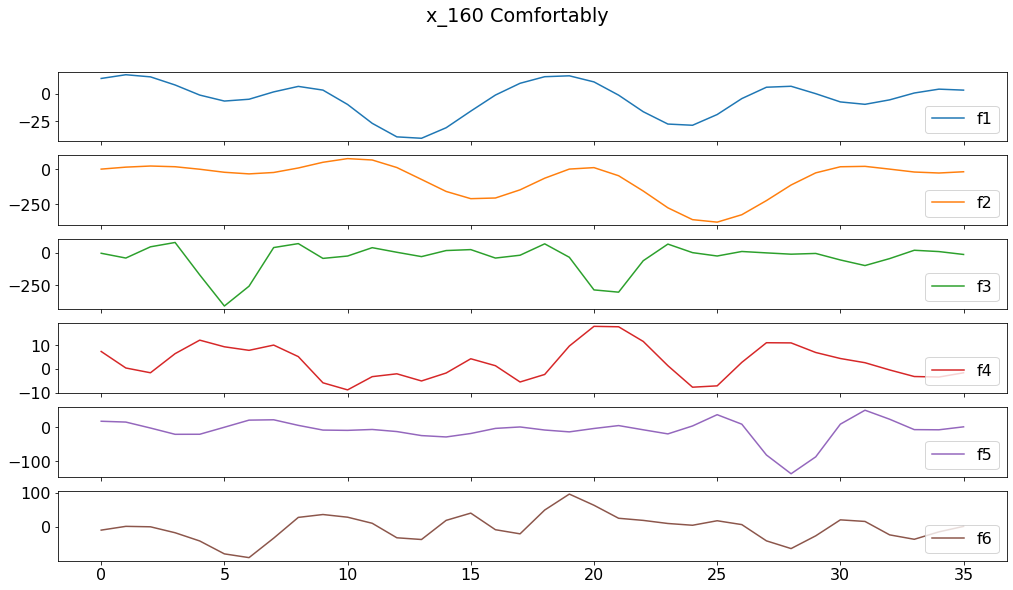

In [ ]:
i = 160
y=target_labels[i]
x=pd.DataFrame(data[i], columns=['f1', 'f2', 'f3', 'f4', 'f5','f6'])

axis = x.plot(subplots=True, figsize=(17, 9), title='x_'+str(i)+' '+y)
for ax in axis:
    ax.legend(loc='lower right')

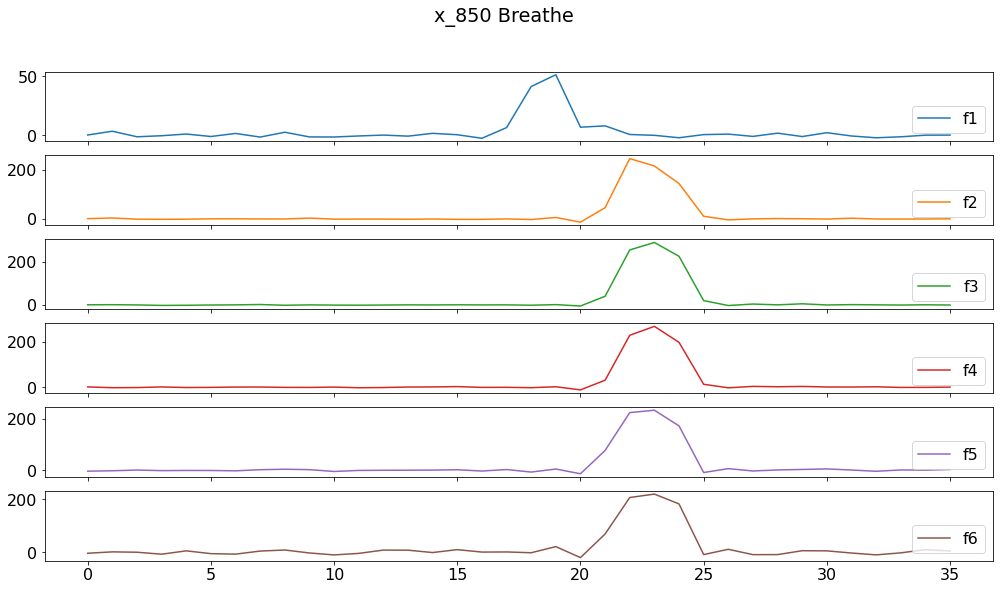

In [ ]:
i = 850
y=target_labels[i]
x=pd.DataFrame(data[i], columns=['f1', 'f2', 'f3', 'f4', 'f5','f6'])

axis = x.plot(subplots=True, figsize=(17, 9), title='x_'+str(i)+' '+y)
for ax in axis:
    ax.legend(loc='lower right')

In [ ]:
data.shape
data_c = np.zeros((data.shape[0], data.shape[1]*data.shape[2]))
for i,x in enumerate(data):
  x= x.T
  data_c[i]= x.reshape(data_c.shape[-1])
data_c.shape

(2429, 216)

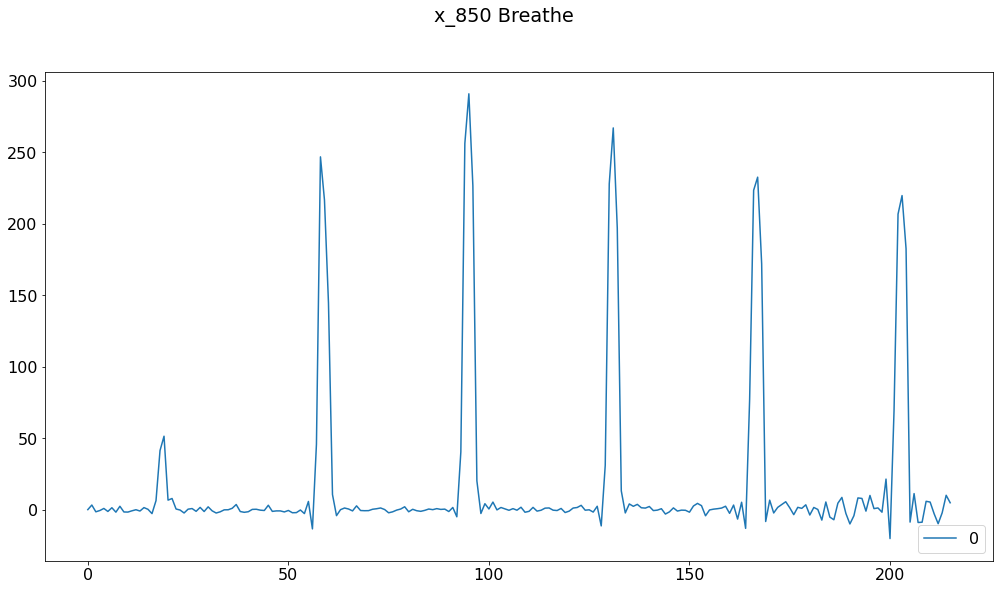

In [ ]:
i = 850
y=target_labels[i]
x=pd.DataFrame(data_c[i])

axis = x.plot(subplots=True, figsize=(17, 9), title='x_'+str(i)+' '+y)
for ax in axis:
    ax.legend(loc='lower right')

## Class distribution

In [ ]:
ret= pd.DataFrame(target).value_counts().sort_index().to_dict()
values= list(ret.values())
labels= list(classes.values())
print(ret)
print(classes)
print(labels)
print(values)

{(0,): 34, (1,): 123, (2,): 270, (3,): 381, (4,): 62, (5,): 153, (6,): 313, (7,): 68, (8,): 120, (9,): 777, (10,): 77, (11,): 51}
{0: 'Wish', 1: 'Another', 2: 'Comfortably', 3: 'Money', 4: 'Breathe', 5: 'Time', 6: 'Brain', 7: 'Echoes', 8: 'Wearing', 9: 'Sorrow', 10: 'Hey', 11: 'Shine'}
['Wish', 'Another', 'Comfortably', 'Money', 'Breathe', 'Time', 'Brain', 'Echoes', 'Wearing', 'Sorrow', 'Hey', 'Shine']
[34, 123, 270, 381, 62, 153, 313, 68, 120, 777, 77, 51]


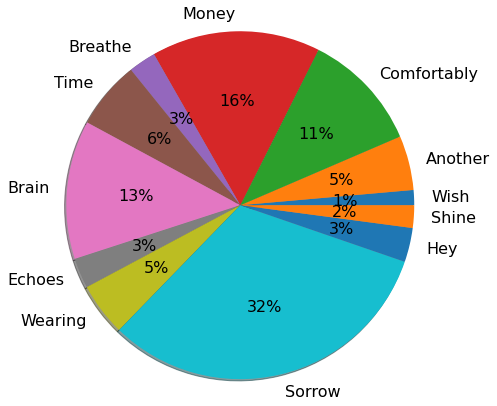

In [ ]:
plt.pie(values, radius=2,  shadow=True, labels=labels, autopct='%1.0f%%')
plt.show()

# Data preparation
In this section we set up the datasets to be used in the next steps. We performed a traditional split as summarized below and we analysed the performance of multiple preprocessing techniques.


```
                   Dataset
                   |     |
      Training (0.9)    Test (0.1)
       |          |
Train (0.9)    Validation (0.1)
```



## Splitting

In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(data, target, test_size = 0.1, random_state=seed, stratify=target)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = 0.1, random_state=seed, stratify=y_train_val)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(1967, 36, 6) (1967,)
(219, 36, 6) (219,)
(243, 36, 6) (243,)


## Preprocessing

Choose only one scaler among the following and DON'T EXECUTE the others:


In [ ]:
# MIN-MAX SCALER --> [0,1]

scaler = MinMaxScaler()
scaler = scaler.fit(X_train.reshape(-1, X_train.shape[-1]))

X_train_scaled = scaler.transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_val_scaled = scaler.transform(X_val.reshape(-1, X_val.shape[-1])).reshape(X_val.shape)
X_test_scaled = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

In [ ]:
# STANDARD SCALER --> removing the mean and scaling to unit variance

scaler = StandardScaler()
scaler = scaler.fit(X_train.reshape(-1, X_train.shape[-1]))

X_train_scaled = scaler.transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_val_scaled = scaler.transform(X_val.reshape(-1, X_val.shape[-1])).reshape(X_val.shape)
X_test_scaled = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

In [ ]:
# ROBUST SCALER --> removing the mean and scaling to unit variance

scaler = RobustScaler()
scaler = scaler.fit(X_train.reshape(-1, X_train.shape[-1]))

X_train_scaled = scaler.transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_val_scaled = scaler.transform(X_val.reshape(-1, X_val.shape[-1])).reshape(X_val.shape)
X_test_scaled = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

In [ ]:
# NORMALIZER --> unit norm

scaler = Normalizer()
scaler = scaler.fit(X_train.reshape(-1, X_train.shape[-1]))

X_train_scaled = scaler.transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_val_scaled = scaler.transform(X_val.reshape(-1, X_val.shape[-1])).reshape(X_val.shape)
X_test_scaled = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

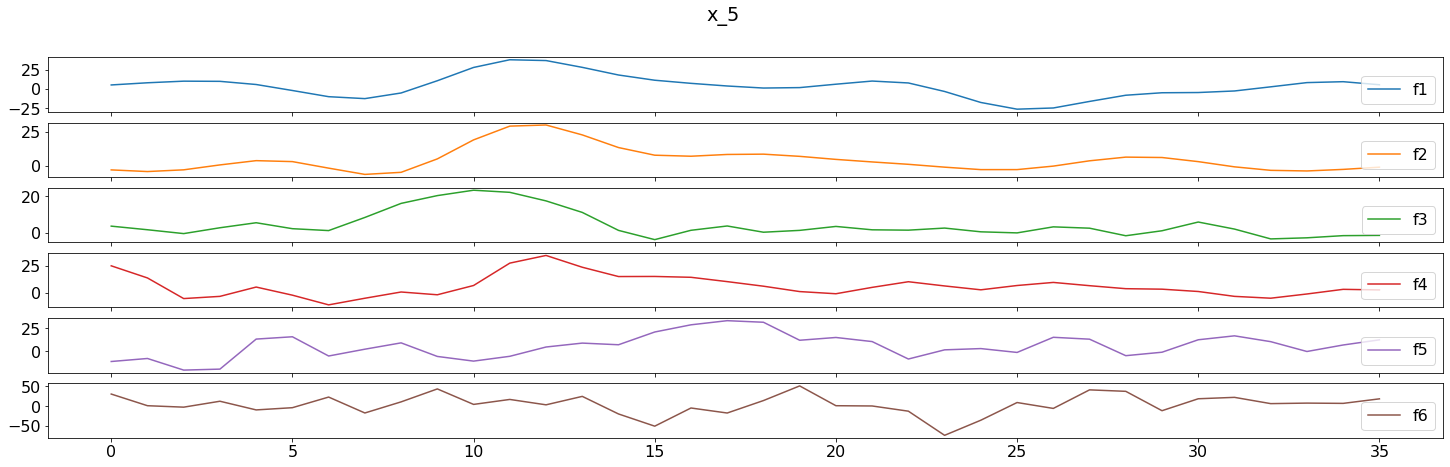

In [ ]:
i = 5
x=pd.DataFrame(X_train[i], columns=['f1', 'f2', 'f3', 'f4', 'f5','f6'])

axis = x.plot(subplots=True, figsize=(25, 7), title='x_'+str(i))
for ax in axis:
    ax.legend(loc='lower right')

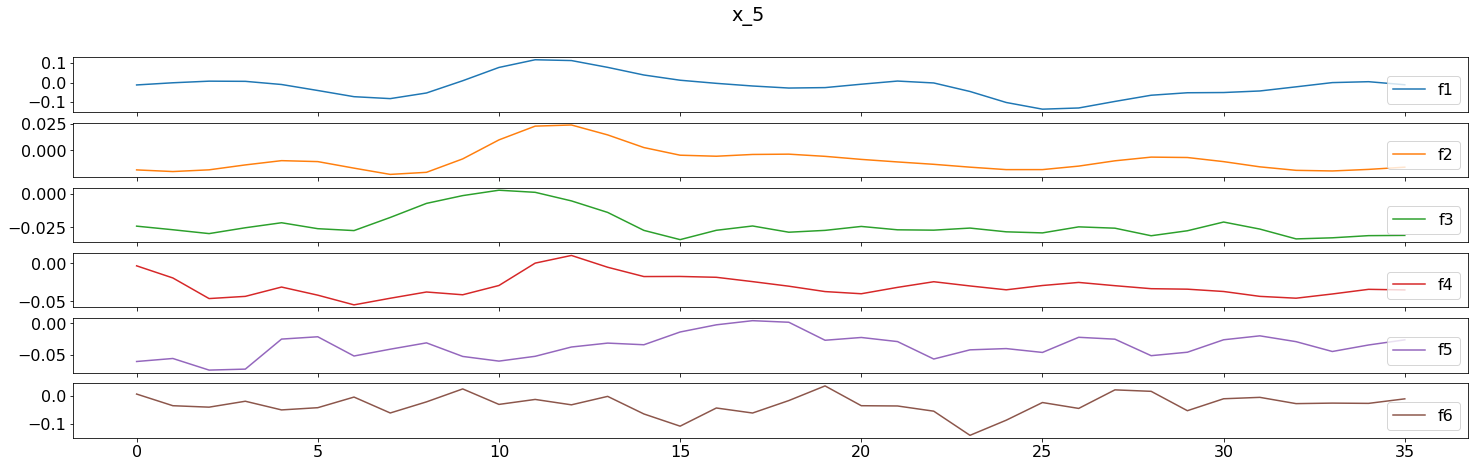

In [ ]:
i = 5
x=pd.DataFrame(X_train_scaled[i], columns=['f1', 'f2', 'f3', 'f4', 'f5','f6'])

axis = x.plot(subplots=True, figsize=(25, 7), title='x_'+str(i))
for ax in axis:
    ax.legend(loc='lower right')